# Top 20 MF + BP GOs for Upregulated DEGs unique to CX

### Import Packages

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
bp_cx_cb_data = pd.read_csv("bp_cx_cb_up_copy.csv")
print(bp_cx_cb_data.shape)
bp_cx_cb_data.head()

(199, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up
0,GO:BP,heterocycle biosynthetic process,GO:0018130,4039,27543,8.900000e-18,8.900000e-18,777,214,0.275418,1.000000,1.000000,216,43,0.199074
1,GO:BP,regulation of cellular metabolic process,GO:0031323,6103,27543,9.790000e-18,9.790000e-18,777,286,0.368082,0.085061,0.085061,222,75,0.337838
2,GO:BP,aromatic compound biosynthetic process,GO:0019438,4050,27543,1.240000e-17,1.240000e-17,777,214,0.275418,1.000000,1.000000,216,43,0.199074
3,GO:BP,regulation of nucleobase-containing compound m...,GO:0019219,4088,27543,1.710000e-17,1.710000e-17,777,215,0.276705,1.000000,1.000000,216,50,0.231481
4,GO:BP,organic cyclic compound biosynthetic process,GO:1901362,4203,27543,4.470000e-17,4.470000e-17,777,218,0.280566,1.000000,1.000000,216,43,0.199074


In [3]:
bp_cx_cb_data = bp_cx_cb_data[(bp_cx_cb_data.term_size < 5000) & (bp_cx_cb_data.term_size > 8)]
bp_cx_cb_data.shape

(162, 15)

In [4]:
bp_unique_cx = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CB_Up >= 0.05)].sort_values(by="adjusted_p_value__CX_Up")
bp_unique_cx = bp_unique_cx[1:21].sort_values(by='gene_ratio_CX_Up', ascending = False)
bp_unique_cx["region"] = "CX"
print(bp_unique_cx.shape)
bp_unique_cx.head()

(20, 16)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region
12,GO:BP,cellular nitrogen compound biosynthetic process,GO:0044271,4774,27543,1.200000e-14,1.200000e-14,777,231,0.297297,1.0,1.0,6,3,0.500000,CX
27,GO:BP,macromolecule biosynthetic process,GO:0009059,4797,27543,1.620000e-10,1.620000e-10,777,218,0.280566,1.0,1.0,216,50,0.231481,CX
4,GO:BP,organic cyclic compound biosynthetic process,GO:1901362,4203,27543,4.470000e-17,4.470000e-17,777,218,0.280566,1.0,1.0,216,43,0.199074,CX
3,GO:BP,regulation of nucleobase-containing compound m...,GO:0019219,4088,27543,1.710000e-17,1.710000e-17,777,215,0.276705,1.0,1.0,216,50,0.231481,CX
2,GO:BP,aromatic compound biosynthetic process,GO:0019438,4050,27543,1.240000e-17,1.240000e-17,777,214,0.275418,1.0,1.0,216,43,0.199074,CX


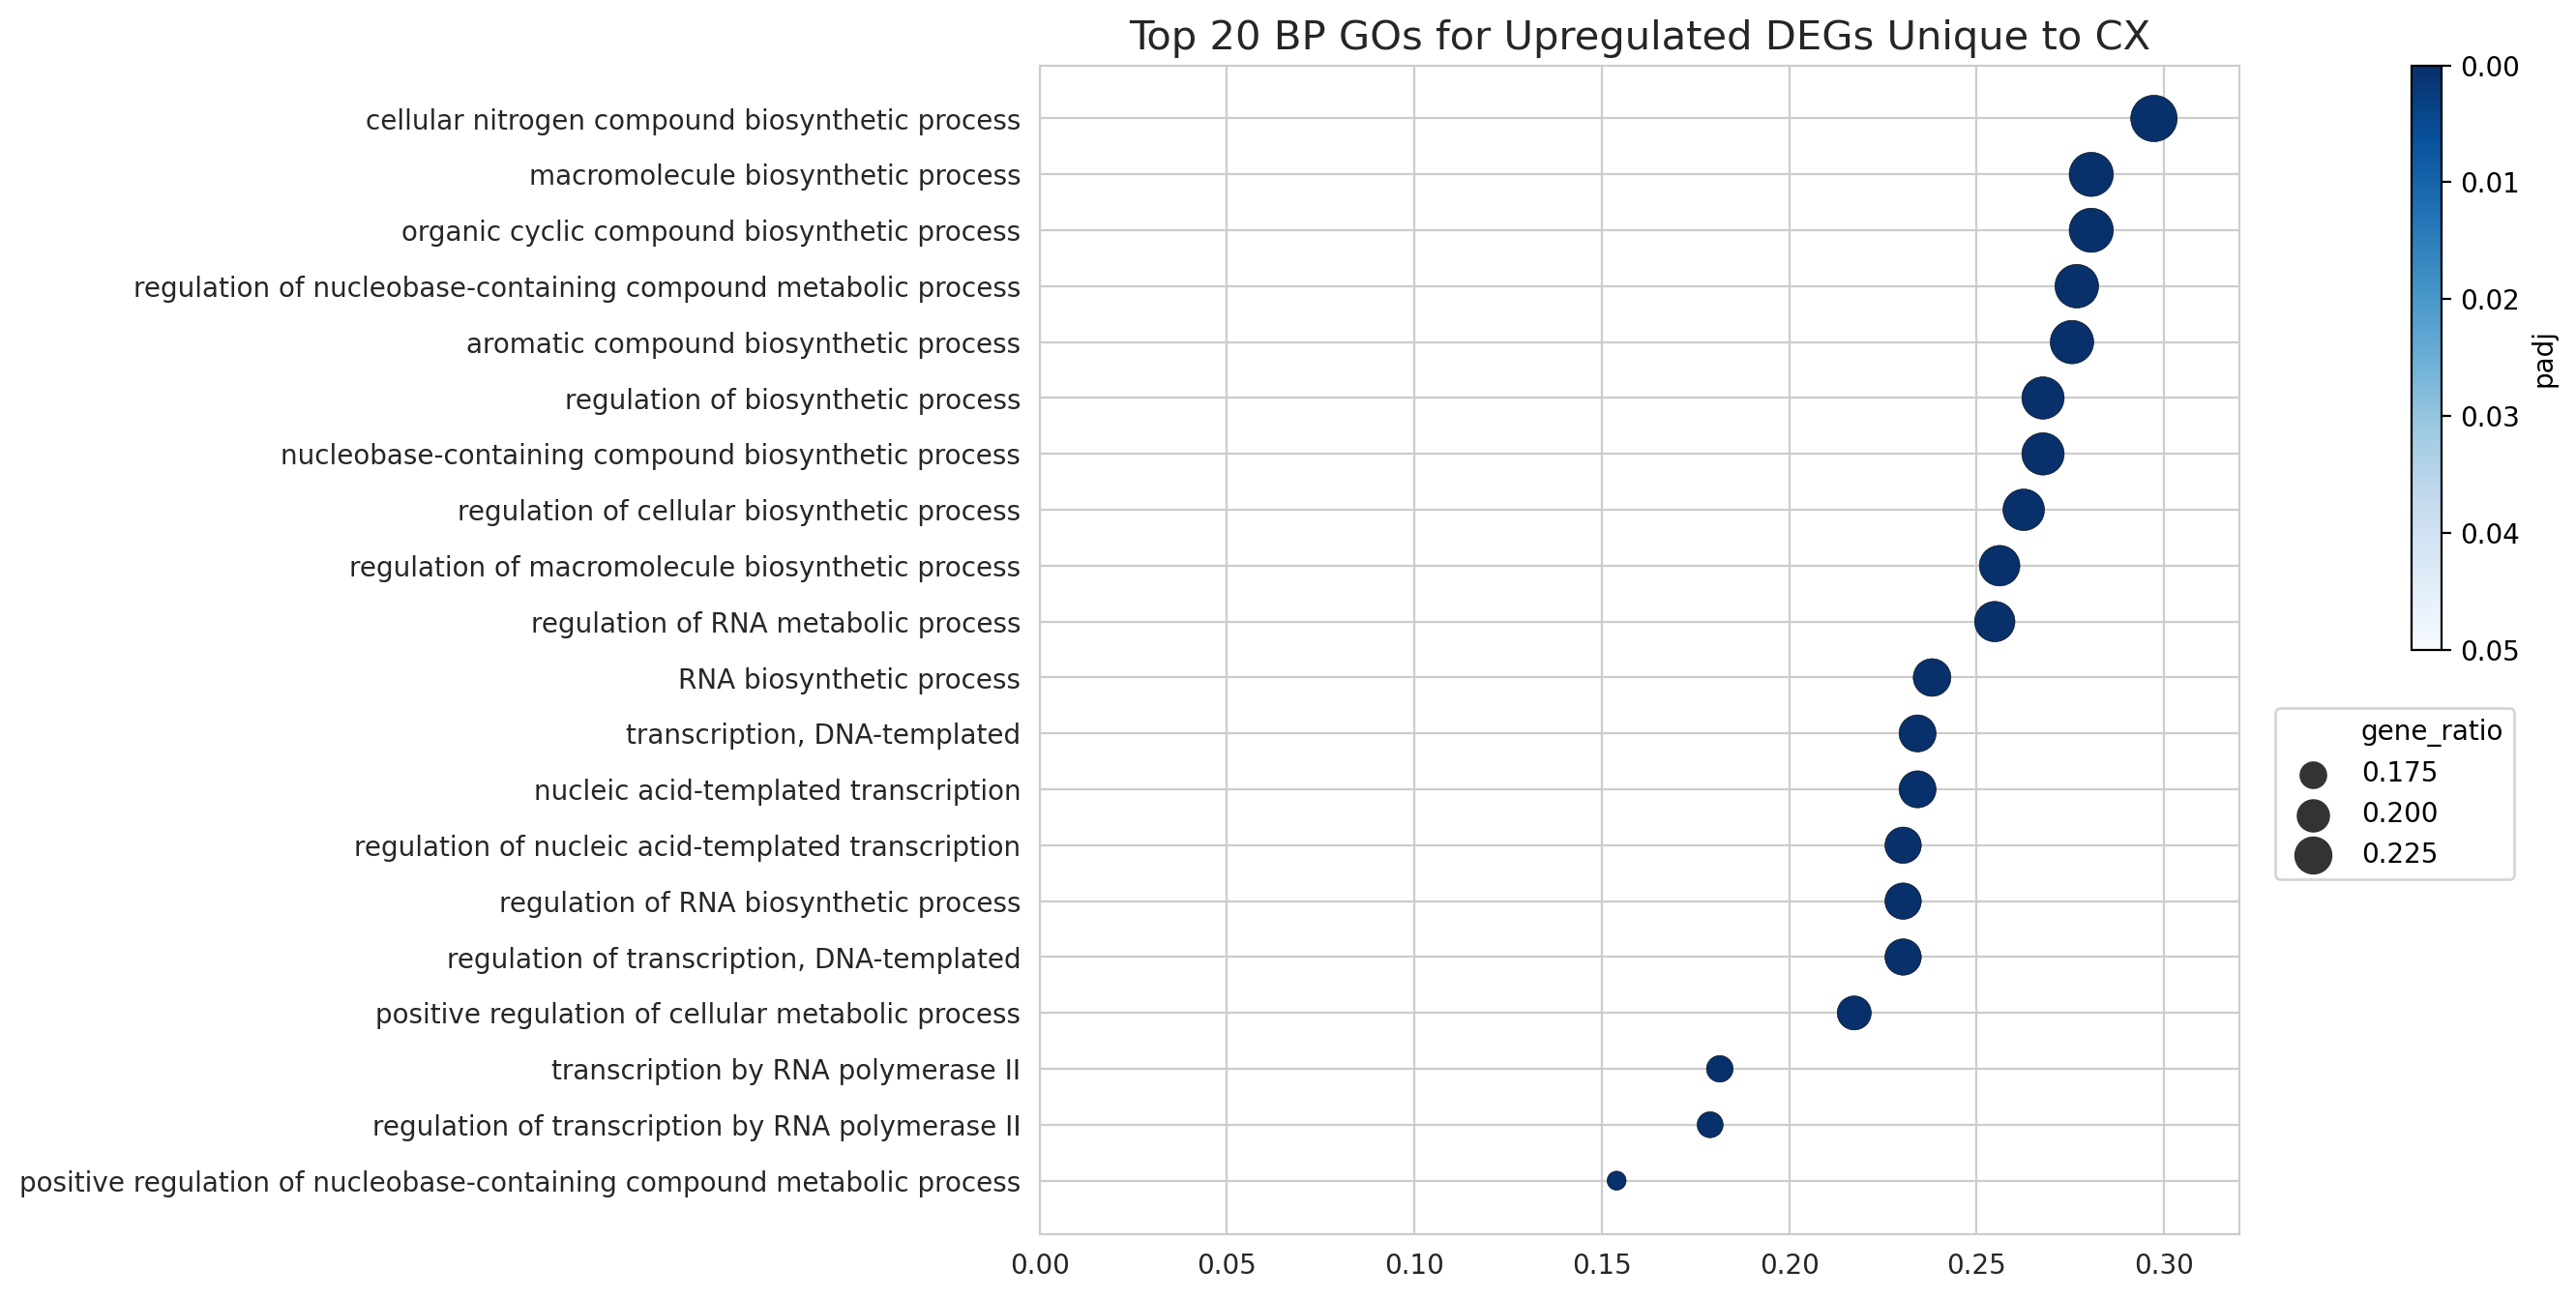

In [41]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.05)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_unique_cx, 
                         x="gene_ratio_CX_Up", 
                         y="term_name", 
                         hue="adjusted_p_value__CX_Up", 
                         size="gene_ratio_CX_Up", 
                         sizes=(50, 300),
                         hue_norm=norm,
                         palette="Blues_r",
                         edgecolor="black",
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlabel = "", ylabel="", xlim=(0, 0.32))

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
l[6] = "gene_ratio"
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 20 BP GOs for Upregulated DEGs Unique to CX", size=15)

# plt.tight_layout()

plt.savefig('Top_20_BP_GOs_Up_CX.pdf', bbox_inches='tight')

plt.show(ax)

In [6]:
mf_cx_cb_data = pd.read_csv("mf_cx_cb_up_copy.csv")
print(mf_cx_cb_data.shape)
mf_cx_cb_data.head()

(62, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up
0,GO:MF,binding,GO:0005488,16232,25412,6.070000e-14,6.070000e-14,761,590,0.775296,1.000000,1.000000,214,156,0.728972
1,GO:MF,protein binding,GO:0005515,10481,25412,2.070000e-13,2.070000e-13,744,415,0.557796,0.002953,0.002953,222,125,0.563063
2,GO:MF,catalytic activity,GO:0003824,5730,25412,4.930000e-12,4.930000e-12,756,262,0.346561,1.000000,1.000000,30,14,0.466667
3,GO:MF,DNA binding,GO:0003677,2406,25412,2.760000e-11,2.760000e-11,777,140,0.180180,1.000000,1.000000,222,35,0.157658
4,GO:MF,ion binding,GO:0043167,5914,25412,6.890000e-11,6.890000e-11,756,264,0.349206,1.000000,1.000000,214,66,0.308411


In [7]:
mf_cx_cb_data = mf_cx_cb_data[(mf_cx_cb_data.term_size < 5000) & (mf_cx_cb_data.term_size > 8)]
mf_cx_cb_data.shape

(48, 15)

In [8]:
mf_unique_cx = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CB_Up >= 0.05)].sort_values(by="adjusted_p_value__CX_Up")
mf_unique_cx = mf_unique_cx[1:21].sort_values(by='gene_ratio_CX_Up', ascending = False)
mf_unique_cx["region"] = "CX"
print(mf_unique_cx.shape)
mf_unique_cx.head()

(20, 16)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region
19,GO:MF,cation binding,GO:0043169,4191,25412,6.990000e-06,6.990000e-06,746,182,0.243968,0.155571,0.155571,214,56,0.261682,CX
22,GO:MF,metal ion binding,GO:0046872,4091,25412,4.320000e-05,4.320000e-05,746,175,0.234584,0.081496,0.081496,214,56,0.261682,CX
20,GO:MF,small molecule binding,GO:0036094,2561,25412,2.360000e-05,2.360000e-05,675,113,0.167407,1.000000,1.000000,38,6,0.157895,CX
9,GO:MF,nucleotide binding,GO:0000166,2188,25412,5.430000e-08,5.430000e-08,675,109,0.161481,1.000000,1.000000,38,5,0.131579,CX
10,GO:MF,nucleoside phosphate binding,GO:1901265,2188,25412,5.430000e-08,5.430000e-08,675,109,0.161481,1.000000,1.000000,38,5,0.131579,CX


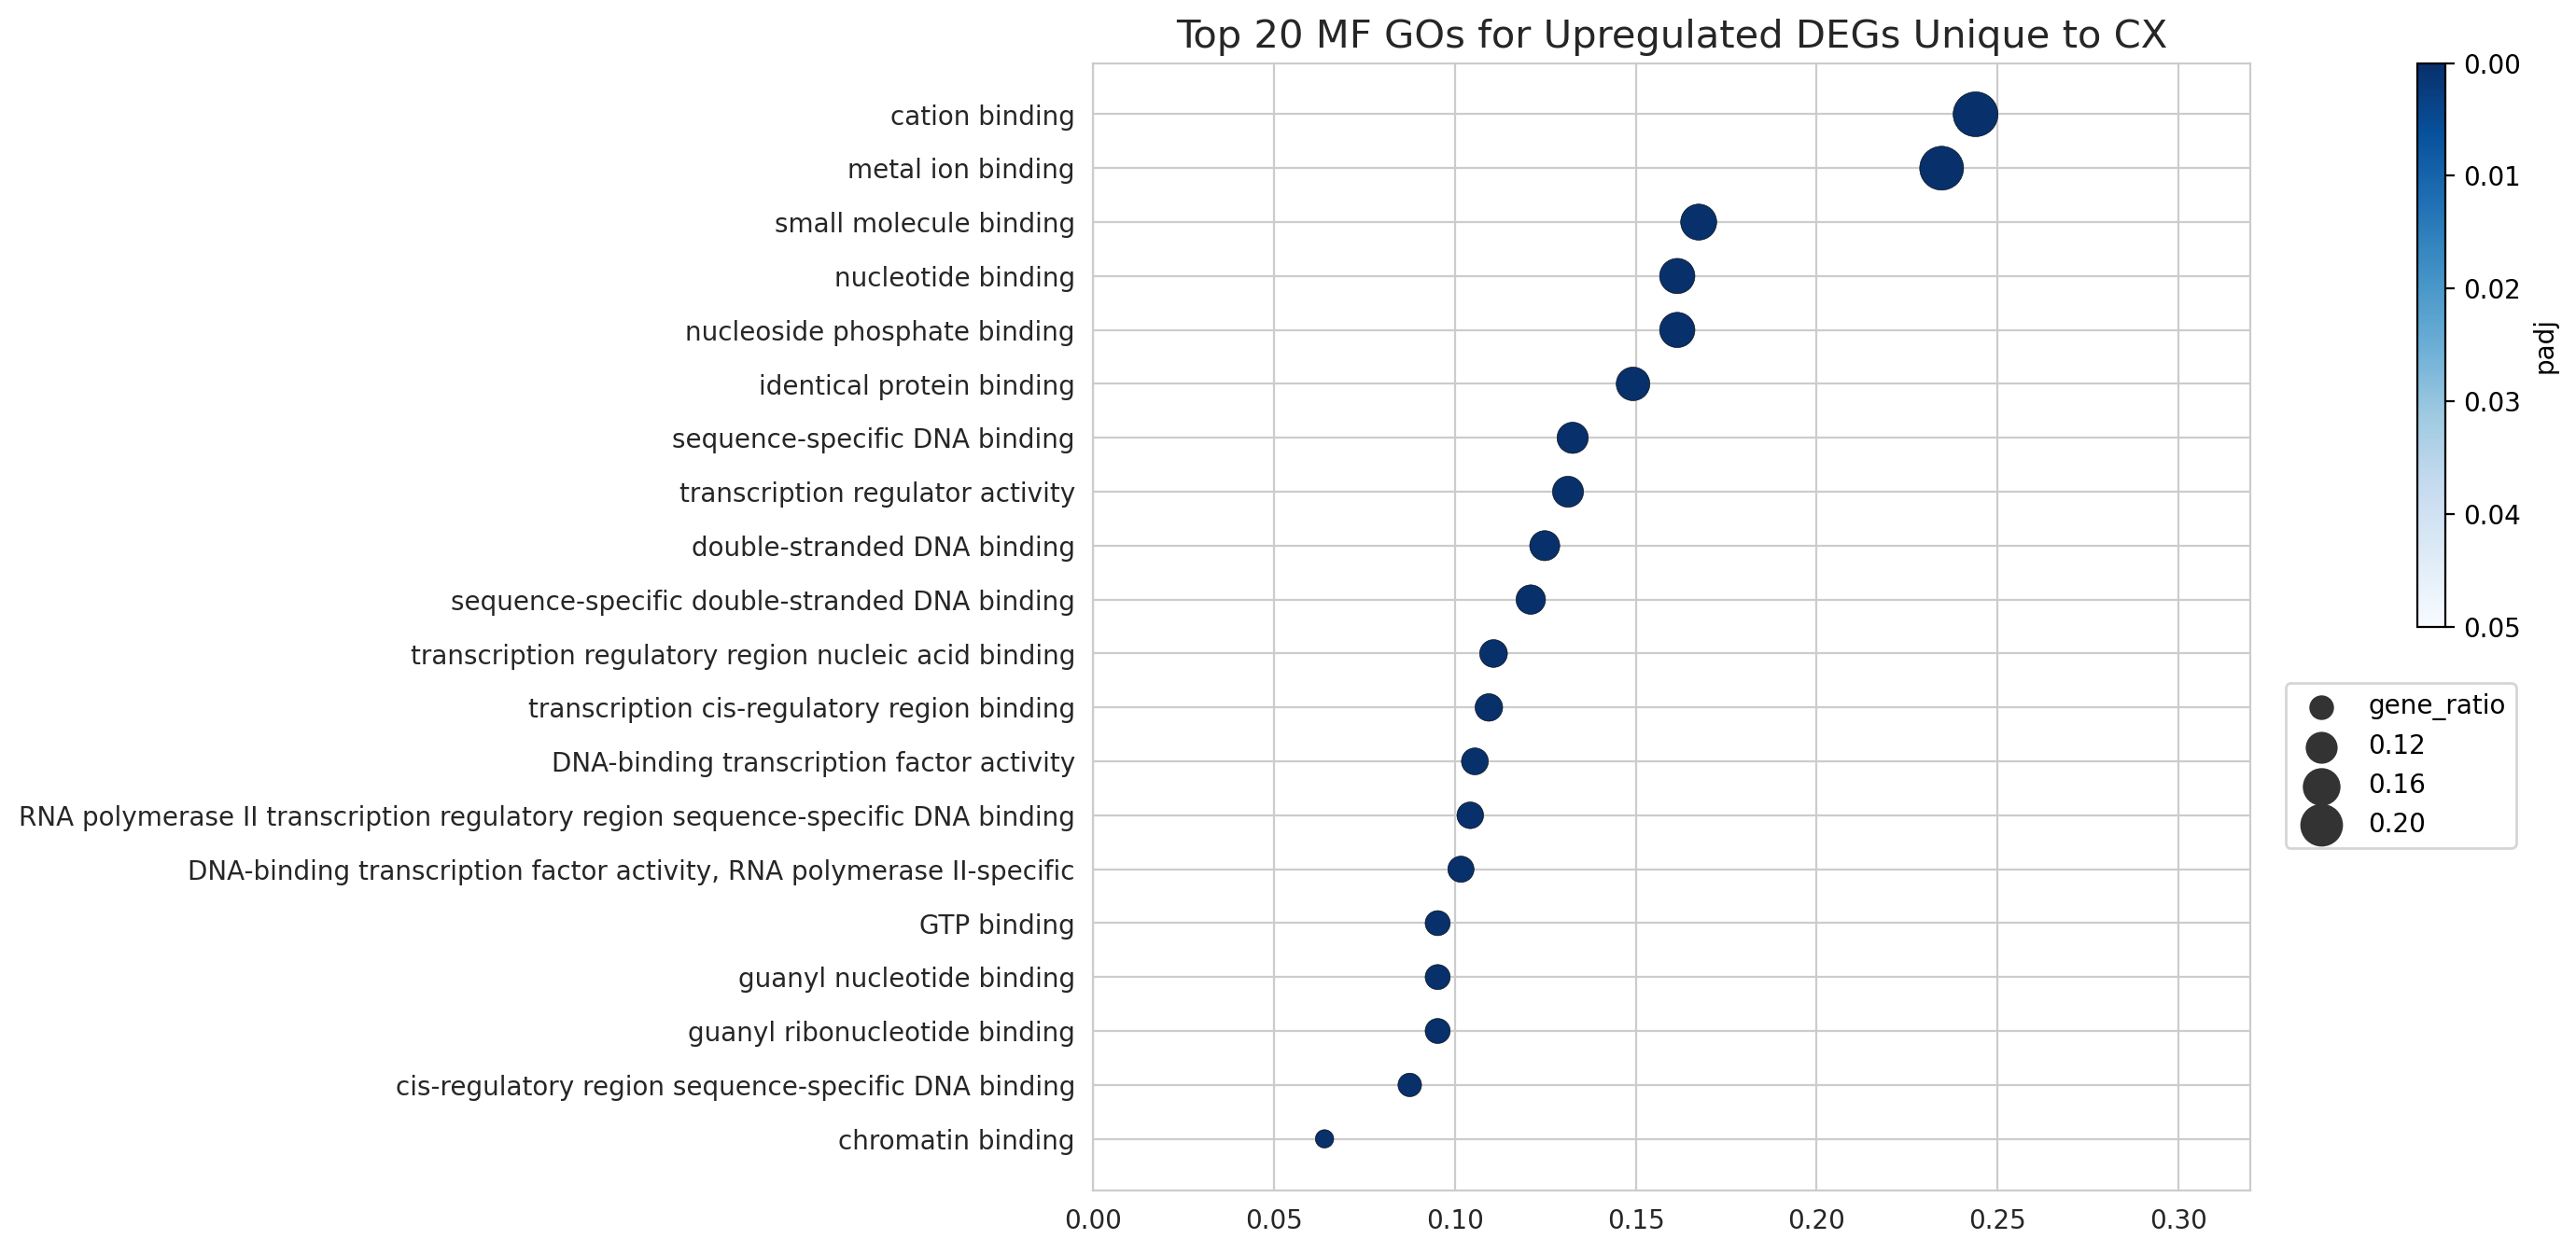

In [42]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.05)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_unique_cx, 
                         x="gene_ratio_CX_Up", 
                         y="term_name", 
                         hue="adjusted_p_value__CX_Up", 
                         size="gene_ratio_CX_Up", 
                         sizes=(50, 300),
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    

sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlabel = "", ylabel="", xlim=(0.0, 0.32))

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
l[6] = "gene_ratio"
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 20 MF GOs for Upregulated DEGs Unique to CX", size=15)

# plt.tight_layout()

plt.savefig('Top_20_MF_GOs_Up_CX.pdf', bbox_inches='tight')

plt.show(ax)